## EDA on Netflix Dataset  

#### Problem Statement Some of the interesting questions (tasks) which can be performed on this dataset -
 #### 1. Understanding what content is available in different countries
 #### 2. Identifying similar content by matching text-based features
 #### 3. Network analysis of Actors / Directors and find interesting insights
 #### 4.  Is Netflix has increasingly focusing on TV rather than movies in recent years.

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("netflix.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [5]:
df.shape

(7787, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

###### df.nunique()

In [8]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\vinee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


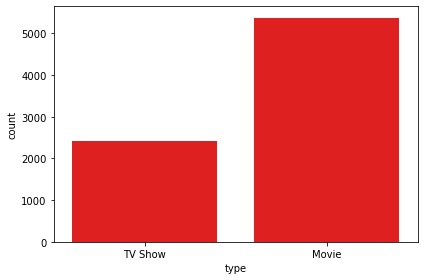

In [10]:
sns.countplot(df['type'],color = 'red')
plt.tight_layout()

(-1.2493015905732927,
 1.2459835352546422,
 -1.207753237409533,
 1.1936665492525396)

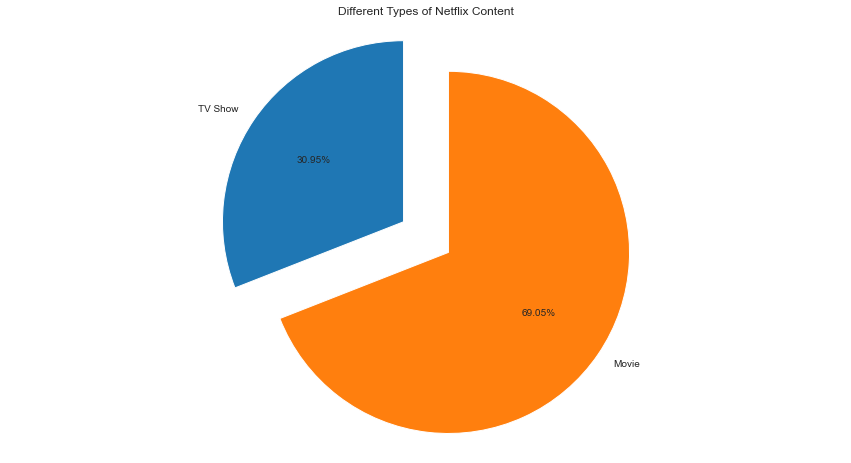

In [43]:
plt.figure(figsize=(15,8))
label=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(), labels=label, explode=[0.15,0.15], 
        autopct='%1.2f%%', startangle=90)
plt.title('Different Types of Netflix Content')
plt.axis('equal')

<AxesSubplot:xlabel='release_year'>

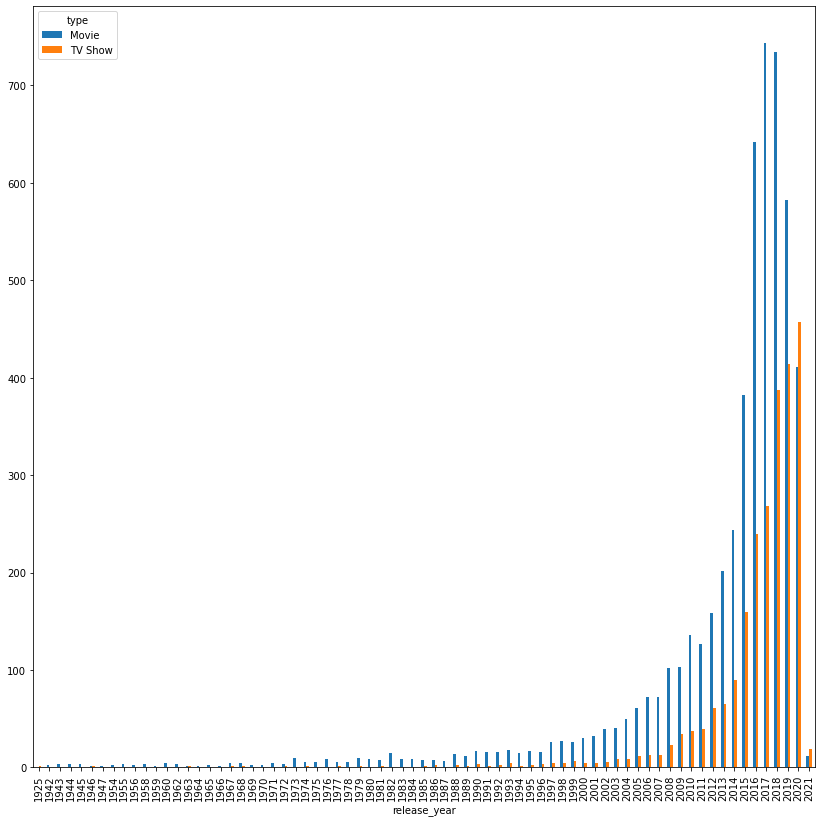

In [11]:
pd.crosstab(df.release_year, df.type).plot(kind='bar',figsize = (14,14))

In [12]:
#Now we divide the categories in so old, Old, Early 21st century and New 

In [13]:
def release(release_date):
    if 1960<=release_date<=1990:
        return 'So old'
    elif 1990<release_date<=2000:
        return 'Old'
    elif 2000<release_date<=2015:
        return 'Early 21st century'
    elif 2015<release_date<=2021:
        return 'New'
    else:
        return None
df['Movie Release type']= df['release_year'].apply(release)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Movie Release type
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,New
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,New
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Early 21st century
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Early 21st century
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Early 21st century
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Early 21st century
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Early 21st century
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",New
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,New


In [15]:
df['Movie Release type'].value_counts()

New                   4910
Early 21st century    2394
Old                    239
So old                 218
Name: Movie Release type, dtype: int64

C:\Users\vinee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Movie Release type', ylabel='count'>

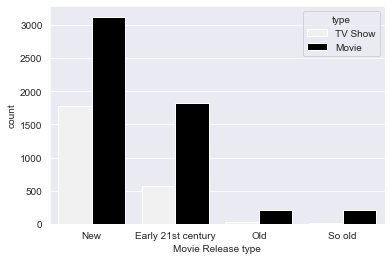

In [40]:
sns.countplot(df['Movie Release type'][:],hue = df['type'],color = 'black')

In [17]:
df[df['type'] == 'TV Show'].sort_values('release_year').tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Movie Release type
980,s981,TV Show,Bling Empire,NaN,NaN,NaN,"January 15, 2021",2021,TV-MA,1 Season,Reality TV,Follow LA's wildly wealthy Asian and Asian Ame...,New
5921,s5922,TV Show,Surviving Death,NaN,NaN,United States,"January 6, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",What happens after we die? This docuseries exp...,New
4390,s4391,TV Show,Nailed It! Mexico,NaN,"Omar Chaparro, Anna Ruiz","Mexico, United States","January 5, 2021",2021,TV-PG,3 Seasons,"International TV Shows, Reality TV, Spanish-La...","The fun, fondant and hilarious cake fails head...",New
4965,s4966,TV Show,Pretend It’s a City,NaN,Fran Lebowitz,United States,"January 8, 2021",2021,TV-14,1 Season,Docuseries,Wander the New York City streets and fascinati...,New
2672,s2673,TV Show,Headspace Guide to Meditation,NaN,Andy Puddicombe,United States,"January 1, 2021",2021,TV-G,1 Season,"Docuseries, Science & Nature TV","Headspace takes a friendly, animated look at t...",New


In [18]:
df[df['type']=='Movie'].sort_values('release_year').tail(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Movie Release type
5323,s5324,Movie,"Sí, Mi Amor",Pedro Flores Maldonado,"Yiddá Eslava, Julián Zucchi, Andrés Salas, Mag...",NaN,"May 6, 2020",2020,TV-MA,107 min,"Comedies, International Movies, Romantic Movies",A blindsided boyfriend must prove his fidelity...,New
5284,s5285,Movie,Rose Island,Sydney Sibilia,"Elio Germano, Matilda De Angelis, Tom Wlaschih...",Italy,"December 9, 2020",2020,TV-14,119 min,"Comedies, Dramas, International Movies",An idealistic engineer builds his own island o...,New
5281,s5282,Movie,Roped,Shaun Paul Piccinino,"Josh Swickard, Casper Van Dien, Lorynn York, C...",United States,"May 2, 2020",2020,PG,90 min,"Children & Family Movies, Dramas, Romantic Movies",A star cowboy in a traveling rodeo gets thrown...,New
470,s471,Movie,American Murder: The Family Next Door,Jenny Popplewell,NaN,United States,"September 30, 2020",2020,TV-MA,84 min,Documentaries,"Using raw, firsthand footage, this documentary...",New
2236,s2237,Movie,Forensic,"Akhil Paul, Anas Khan","Tovino Thomas, Mamtha Mohandas, Renji Panicker...",India,"June 7, 2020",2020,TV-14,132 min,"International Movies, Thrillers",A pair of officers with history navigates clue...,New
525,s526,Movie,Angu Vaikuntapurathu (Malayalam),Trivikram Srinivas,"Allu Arjun, Pooja Hegde, Tabu, Sushanth, Nivet...",NaN,"March 5, 2020",2020,TV-14,162 min,"Action & Adventure, Comedies, Dramas",After growing up enduring criticism from his f...,New
5279,s5280,Movie,Rooting for Roona,"Pavitra Chalam, Akshay Shankar",NaN,India,"October 15, 2020",2020,TV-PG,42 min,"Documentaries, International Movies","In rural India, a child with hydrocephalus get...",New
520,s521,Movie,Angela's Christmas Wish,Damien O’Connor,"Lucy O'Connell, Brendan Mullins, Ruth Negga, L...",United States,"December 1, 2020",2020,TV-Y,48 min,Children & Family Movies,"With her father working far away in Australia,...",New
7551,s7552,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,"January 1, 2021",2021,TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a...",New
7220,s7221,Movie,Tribhanga - Tedhi Medhi Crazy,Renuka Shahane,"Kajol, Tanvi Azmi, Mithila Palkar, Kunaal Roy ...",NaN,"January 15, 2021",2021,TV-MA,96 min,"Dramas, International Movies","When her estranged mother falls into a coma, a...",New


In [19]:
#Rating

In [20]:
df.groupby('rating').type.value_counts()

rating    type   
G         Movie        39
NC-17     Movie         3
NR        Movie        79
          TV Show       5
PG        Movie       247
PG-13     Movie       386
R         Movie       663
          TV Show       2
TV-14     Movie      1272
          TV Show     659
TV-G      Movie       111
          TV Show      83
TV-MA     Movie      1845
          TV Show    1018
TV-PG     Movie       505
          TV Show     301
TV-Y      TV Show     163
          Movie       117
TV-Y7     TV Show     176
          Movie        95
TV-Y7-FV  Movie         5
          TV Show       1
UR        Movie         5
Name: type, dtype: int64

C:\Users\vinee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

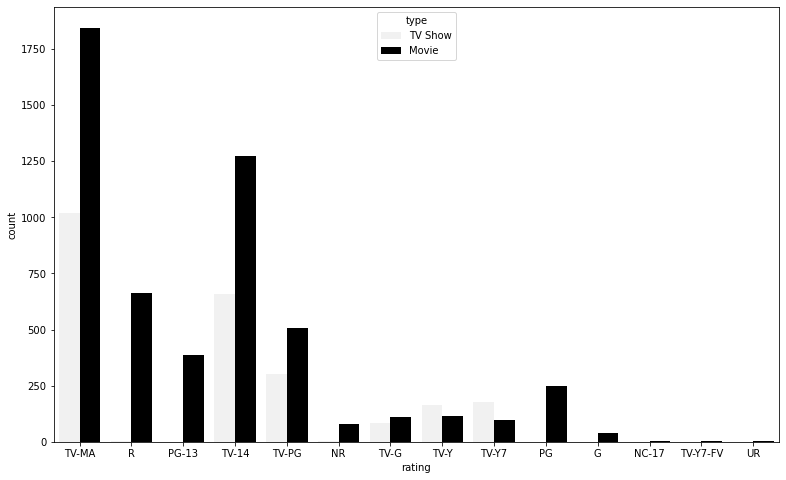

In [21]:
plt.figure(figsize=(13,8))
sns.countplot(df['rating'][:],hue = df['type'],color='black')

In [22]:
x = df['country'].value_counts().head(25)

In [23]:
x

United States                    2555
India                             923
United Kingdom                    397
Japan                             226
South Korea                       183
Canada                            177
Spain                             134
France                            115
Egypt                             101
Turkey                            100
Mexico                            100
Australia                          83
Taiwan                             78
Brazil                             72
Philippines                        71
Indonesia                          70
Nigeria                            70
United Kingdom, United States      64
Germany                            61
United States, Canada              60
Thailand                           57
China                              57
Hong Kong                          52
Argentina                          50
Canada, United States              42
Name: country, dtype: int64

<AxesSubplot:>

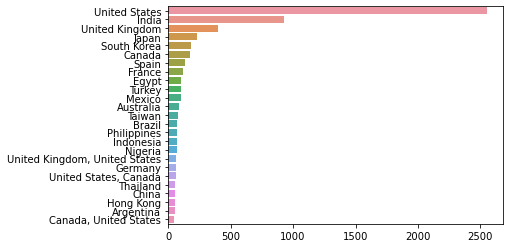

In [24]:
sns.barplot(x = x.values,y = x.index)

In [41]:
print('10 top country with large no. of movies')
df.groupby('type').country.value_counts()['Movie'][:10]

10 top country with large no. of movies


country
United States     1850
India              852
United Kingdom     193
Canada             118
Egypt               89
Spain               89
Turkey              73
Philippines         70
France              69
Japan               69
Name: country, dtype: int64

In [49]:
print('10 top country with large no. of shows')
df.groupby('type').country.value_counts()['TV Show'][:10]

10 top country with large no. of shows


country
United States     705
United Kingdom    204
Japan             157
South Korea       147
India              71
Taiwan             68
Canada             59
Australia          46
France             46
Spain              45
Name: country, dtype: int64

In [27]:
N = df['listed_in'].value_counts()[:20]

In [28]:
N

Documentaries                                        334
Stand-Up Comedy                                      321
Dramas, International Movies                         320
Comedies, Dramas, International Movies               243
Dramas, Independent Movies, International Movies     215
Kids' TV                                             205
Children & Family Movies                             177
Documentaries, International Movies                  172
Children & Family Movies, Comedies                   169
Comedies, International Movies                       161
Dramas, International Movies, Romantic Movies        153
Comedies, International Movies, Romantic Movies      139
Dramas                                               117
Action & Adventure, Dramas, International Movies     117
International TV Shows, TV Dramas                    111
Dramas, International Movies, Thrillers              109
Crime TV Shows, International TV Shows, TV Dramas    106
Comedies, Dramas, Independent M

<AxesSubplot:>

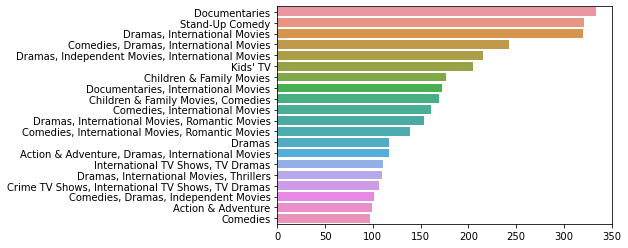

In [29]:
sns.barplot(x = N.values, y = N.index)

In [30]:
# Duration and Sessions 

In [32]:
V=[]
m=[]

for i in df['duration']:
    if i[3:6]=='min':
        V.append(int(i[0:2]))
    elif i[4:7]=='min':
        V.append(int(i[0:3]))
    elif i[3:10]=='Season':
        m.append(int(i[0:2]))

C:\Users\vinee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Duration distribution of movies on netflix(in minute)')

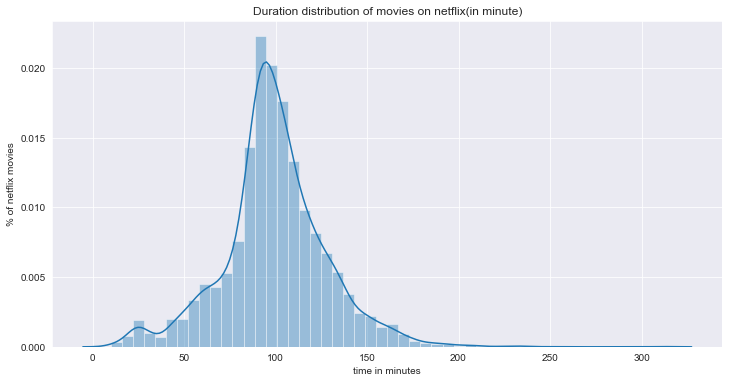

In [34]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.distplot(V)
plt.xlabel('time in minutes')
plt.ylabel('% of netflix movies')
plt.title('Duration distribution of movies on netflix(in minute)')

In [35]:
V=[]
M=[]

for i in df['duration']:
    if i[3:6]=='min':
        V.append(int(i[0:2]))
    elif i[4:7]=='min':
        V.append(int(i[0:3]))
    elif i[3:10]=='Seasons':
        M.append(int(i[0:2]))


C:\Users\vinee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Duration distribution of movies on netflix(no of season')

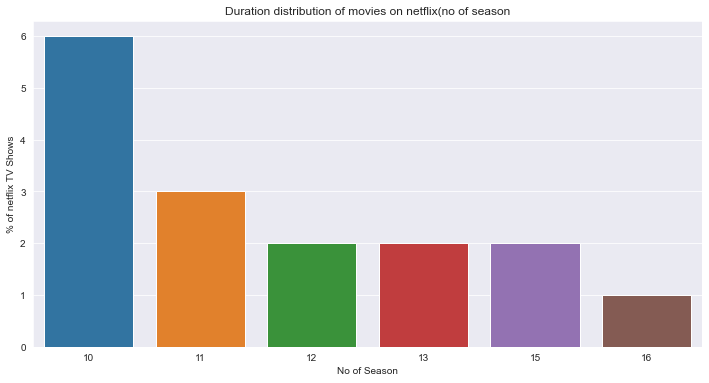

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(M)
plt.xlabel('No of Season')
plt.ylabel('% of netflix TV Shows')
plt.title('Duration distribution of movies on netflix(no of season')

In [37]:
# Top 10 Directors 

<AxesSubplot:xlabel='director'>

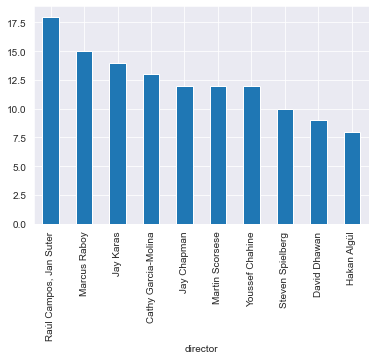

In [38]:
df.groupby('type').director.value_counts()['Movie'][:10].plot(kind='bar')

<AxesSubplot:xlabel='director'>

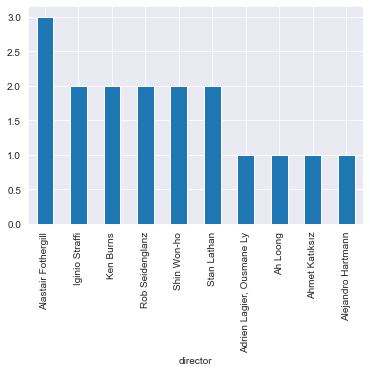

In [39]:
df.groupby('type').director.value_counts()['TV Show'][:10].plot(kind='bar')